# QUESTÃO DE NEGÓCIO

## 1 - Quais os imóveis que a empresa deveria comprar e por qual preço?

## 2 - Após a aquisição, qual o melhor momento para vende-lo e por qual preço?

#### id - Unique ID for each home sold

#### date - Date of the home sale

#### price - Price of each home sold

#### bedrooms - Number of bedrooms

#### bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

#### sqft_living - Square footage of the apartments interior living space

#### sqft_lot - Square footage of the land space

#### floors - Number of floors A one-and-a-half storey house, or 1.5-storey house is a detached home that has a second floor that is about half the size of the main floor, but is off to one side. This style could also simply be called a “half storey house”

#### waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

#### view - An index from 0 to 4 of how good the view of the property was

#### condition - An index from 1 to 5 on the condition of the apartment, greater good

#### grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average 

#### level of construction and design, and 11-13 have a high quality level of construction and design. reater good

#### sqft_above - The square footage of the interior housing space that is above ground level

#### sqft_basement - The square footage of the interior housing space that is below ground level

#### yr_built - The year the house was initially built

#### yr_renovated - The year of the house’s last renovation

#### zipcode - What zipcode area the house is in

#### lat - Lattitude
#### long - Longitude

#### sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

#### sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# 0.0. IMPORTS

In [236]:
import pandas         as pd
import numpy          as np
import seaborn        as sns
import plotly.express as px

from matplotlib            import pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML

import inflection
import warnings

## 0.1. Helper Functions

In [237]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 20
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
    
warnings.filterwarnings( 'ignore' )
pd.options.display.float_format = '{:.2f}'.format

In [238]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [239]:
df_raw = pd.read_csv( 'data/kc_house_data.csv', low_memory=False )

In [240]:
df_raw.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12569,2330000035,20140820T000000,710000.00,3,1.75,1650,10250,1.00,0,0,5,8,1650,0,1963,0,98005,47.61,-122.17,2400,10250


# 1.0. DATA DESCRIPTION

In [241]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [242]:
print(f"Number Of Rows: {df1.shape[0]}" )
print(f"Number Of Cols: {df1.shape[1]}" )

Number Of Rows: 21613
Number Of Cols: 21


## 1.2. Data Types

In [243]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3. Check NA

In [244]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4. Change Types

In [245]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.5. Change Types

In [246]:
df1['price'] = df1['price'].astype( int ) 

## 1.6. Descreptive Statistical

In [247]:
num_attributes = df1.drop( ['date','waterfront'], axis=1 )

In [248]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] )

In [249]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
7,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
8,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53
9,grade,1.00,13.00,12.00,7.66,7.00,1.18,0.77,1.19


In [250]:
df1['date'].max()

Timestamp('2015-05-27 00:00:00')

In [251]:
df1['date'].min()

Timestamp('2014-05-02 00:00:00')

# 2.0.  FEATURE ENGINEERING

In [252]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

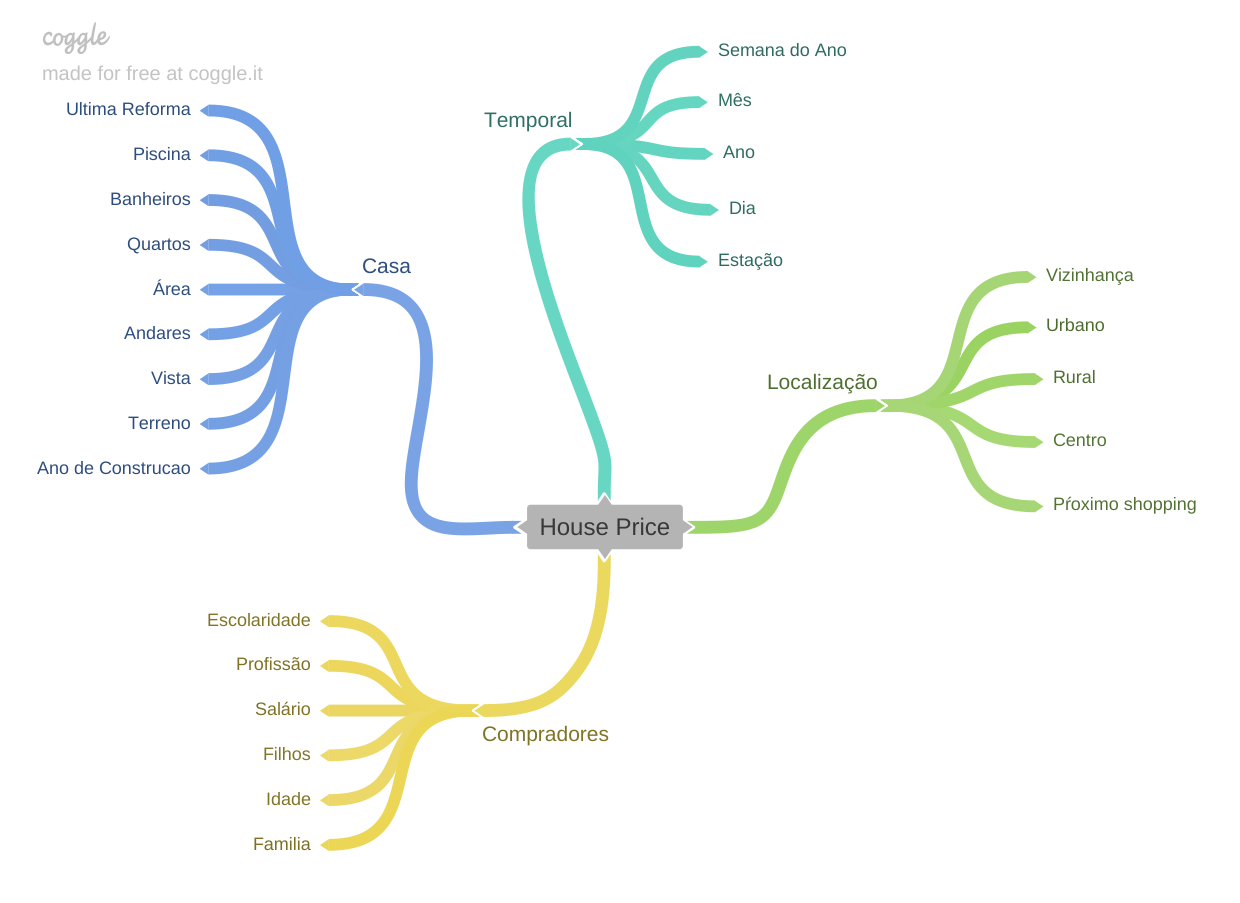

In [253]:
Image( 'image/House_Price.png' )

## 2.2. Criacao de Hipoteses

### 2.2.4. Lista de Hipoteses

#### 1. Casas em determinadas regiões tem menos quartos.

#### 2. Casas construídas após 1970 costumam ter mais andares

#### 3. Casas com vista para a aguá deveriam custar em média 30% a mais.

#### 4. Casas com melhor vista deveriam ter o preço maior.

#### 5. Casas  em melhores condiçoes são em média 50% mais caras.

#### 6. Casas com qualidade superior a 7 deveriam ser 40% mais caras. 

#### 7. Casas que possuem porão deveriam ser em média 20% mais caras. 

#### 8. Casas contruidas antes de 1970 deveriam ser mais baratas.

#### 9. Casas reformadas nos ultimos 5 anos deveriam 30% mais caras.

#### 10. Casas que possuem vizinhos com grandes áreas deveriam ter área maior.

#### 11. Casas Contruidas nos ultimos 20 anos tem qualidade superior

#### 12. Deveriam ser vendidas mais casas em estações de clima quente.

#### 13. Deveriam ser vendidas mais casas na segunda metade do mês.


## 2.3. Feature Engineering 

In [254]:
# Ano
df2['year'] = df2['date'].dt.year

# Mes
df2['month'] = df2['date'].dt.month

# Dia
df2['day'] = df2['date'].dt.day

# Semana do Ano
df2['week_of_year'] = df2['date'].dt.weekofyear

# Estações
df2['season'] = df2['month'].apply( lambda x: 'winter' if x in [12, 1 ,2] else 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'autumn' )

# Porão
df2['basement'] = df3['sqft_basement'].apply( lambda x: 1 if x > 0 else 0 )


In [255]:
df2.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


# 3.0. ANALISE EXPLORATORIA DE DADOS

In [256]:
df3 = df2.copy()

## 3.1. Analise Univariada

### 3.1.1. Response Variable

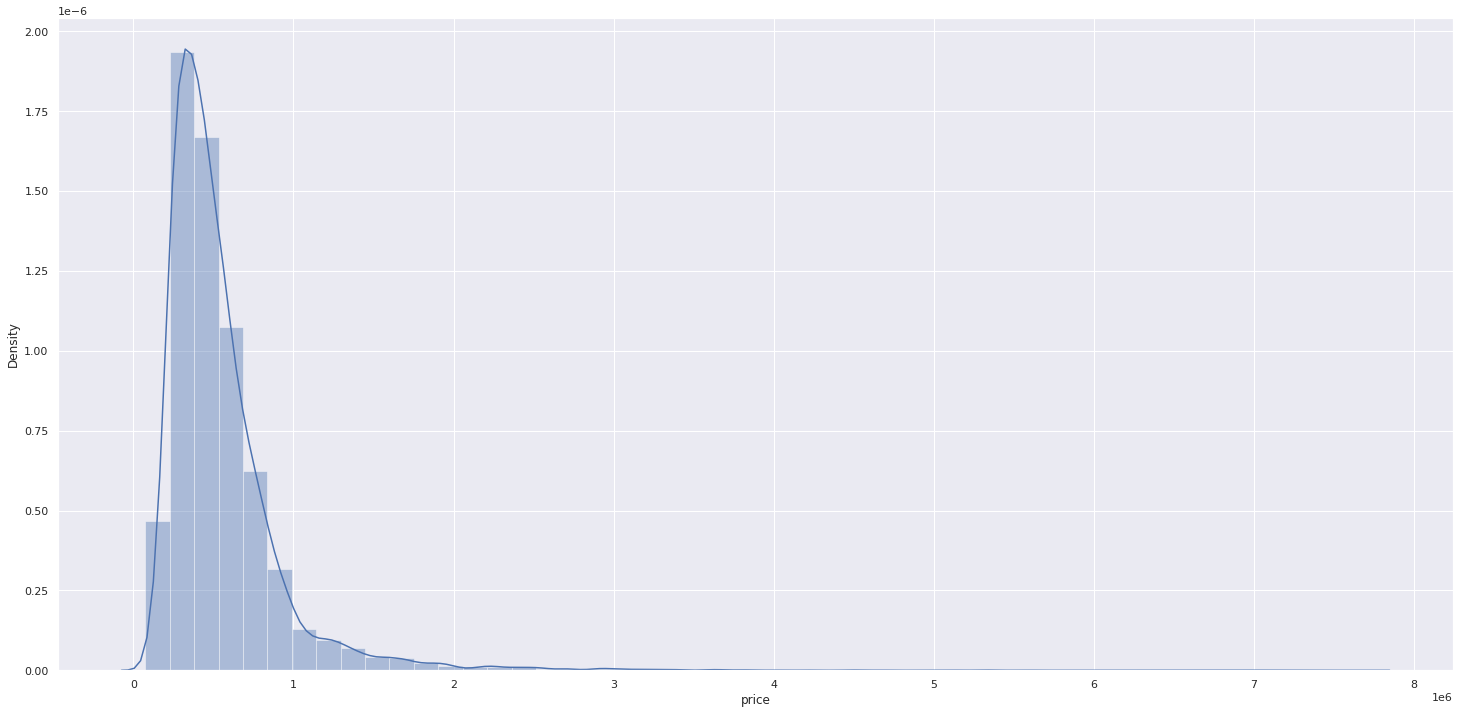

In [257]:
sns.distplot( df3['price'] );

<AxesSubplot:>

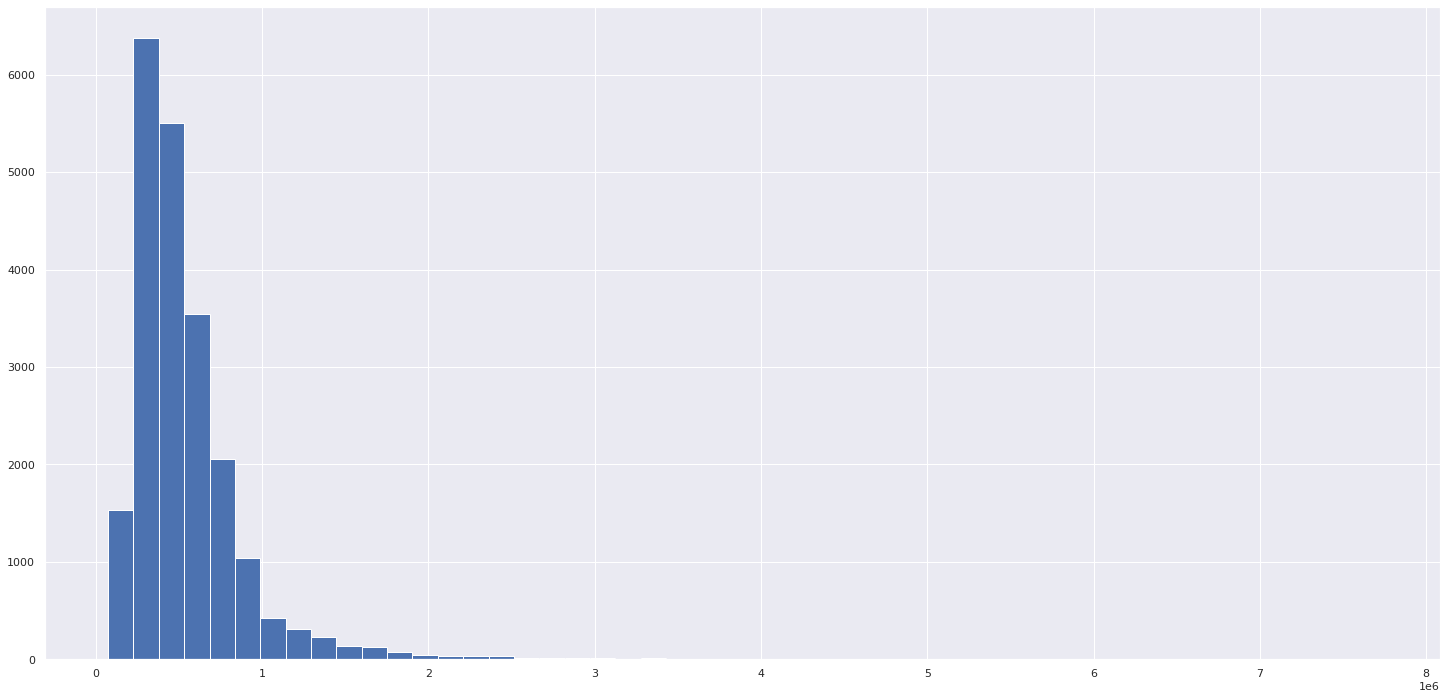

In [258]:
df3['price'].hist(bins=50)

### 3.1.2 Numerical Variable 

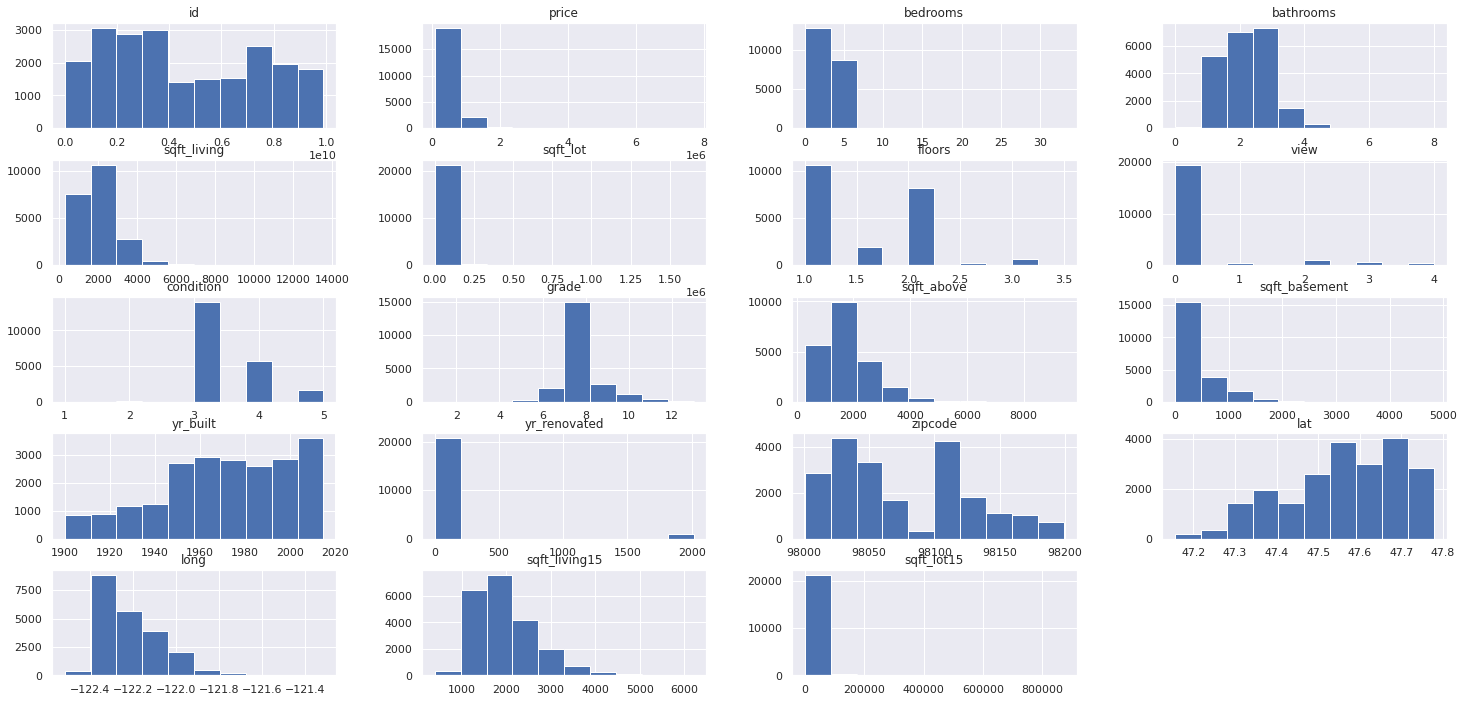

In [259]:
num_attributes.hist()
plt.show()

## 3.2. Analise Bivariada

### H1. Casas em determinadas regiões tem menos quartos. Alterar

### H2. Casas mais novas possuem mais andares.

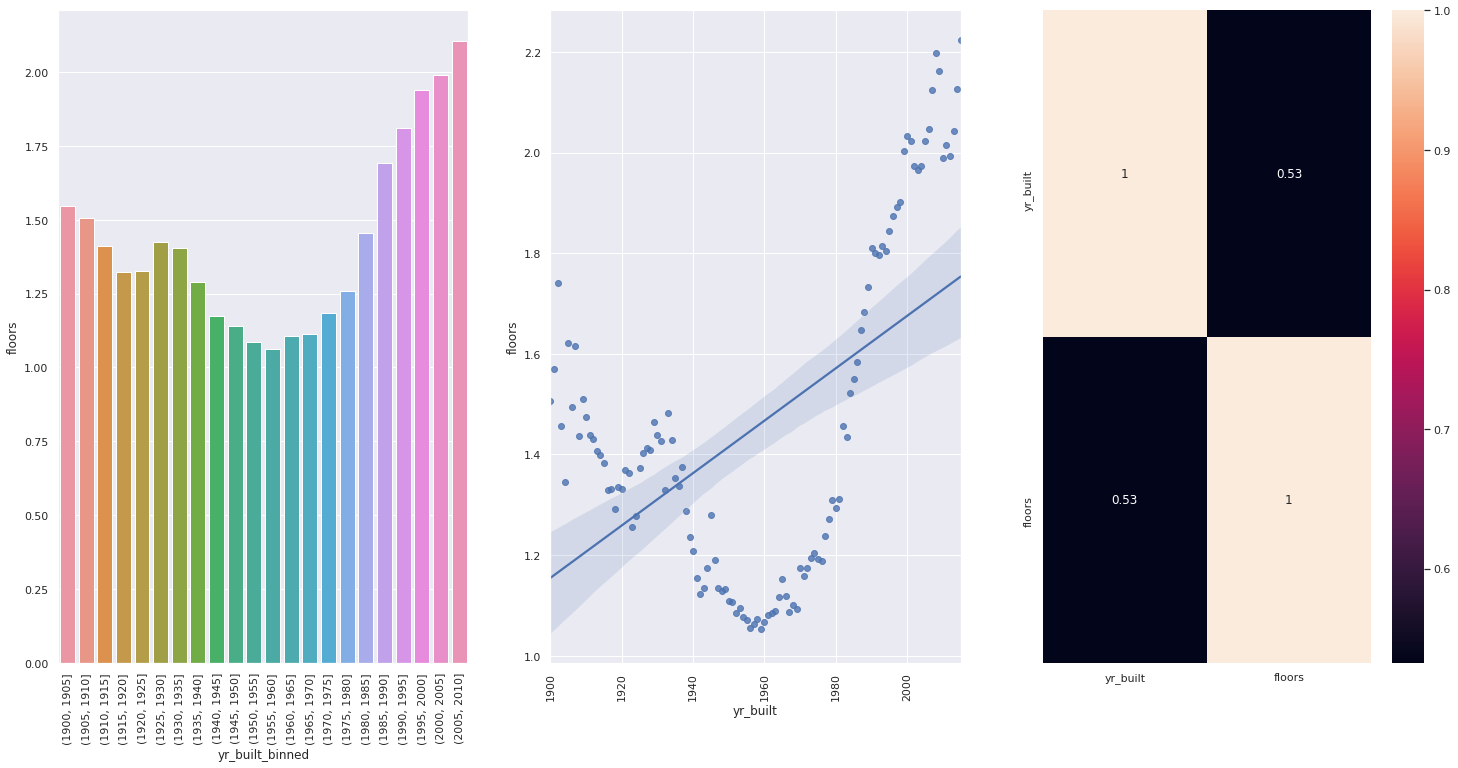

In [260]:
aux1 = df3[['floors', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
bins = list( np.arange( 1900, 2015, 5 ) )
aux1['yr_built_binned'] = pd.cut( aux1['yr_built'], bins=bins )
aux2 = aux1[['yr_built_binned','floors']].groupby('yr_built_binned').mean().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='yr_built_binned', y='floors', data=aux2 );
plt.xticks( rotation=90 );



plt.subplot(1, 3, 2)
sns.regplot( x='yr_built', y='floors', data=aux1 );
plt.xticks( rotation=90 );


plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


### H3 .Casas com vista para a aguá custam em média 200% a mais.

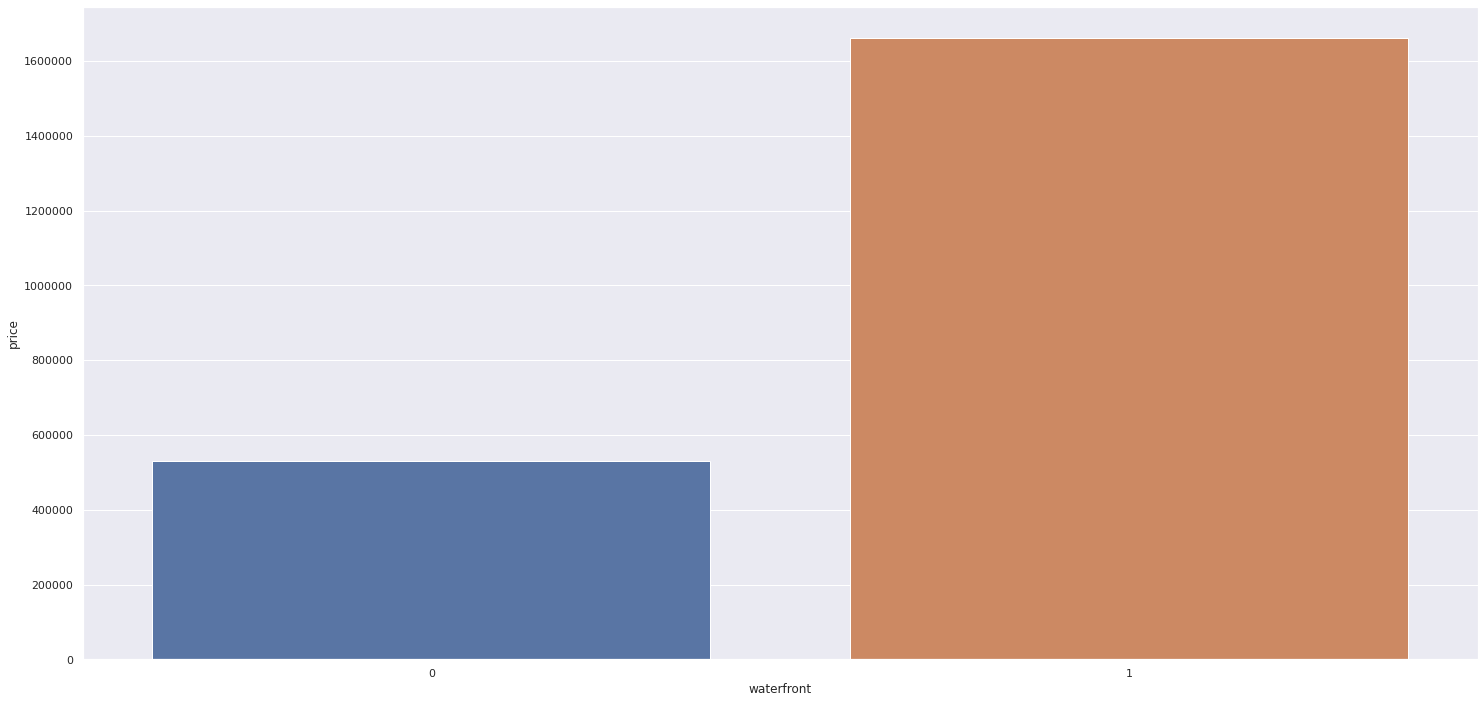

In [261]:
aux1 = df3[['price', 'waterfront']].groupby( 'waterfront' ).mean().reset_index()
sns.barplot( x='waterfront', y='price', data=aux1);
plt.ticklabel_format(style='plain', axis='y')

In [285]:
houses = df2[['id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox( houses,
                         lat = 'lat',
                         lon = 'long',
                         size = 'price',
                         color_continuous_scale = px.colors.cyclical.IceFire,
                         size_max=15,
                         zoom=10 )

fig.update_layout( mapbox_style = 'open-street-map' )
fig.update_layout( height=900, margin={ 'r': 0, 't': 0, 'l': 0, 'b': 0 } )
fig.show();

### H4. Casas com melhor vista deveriam ter o preço maior.

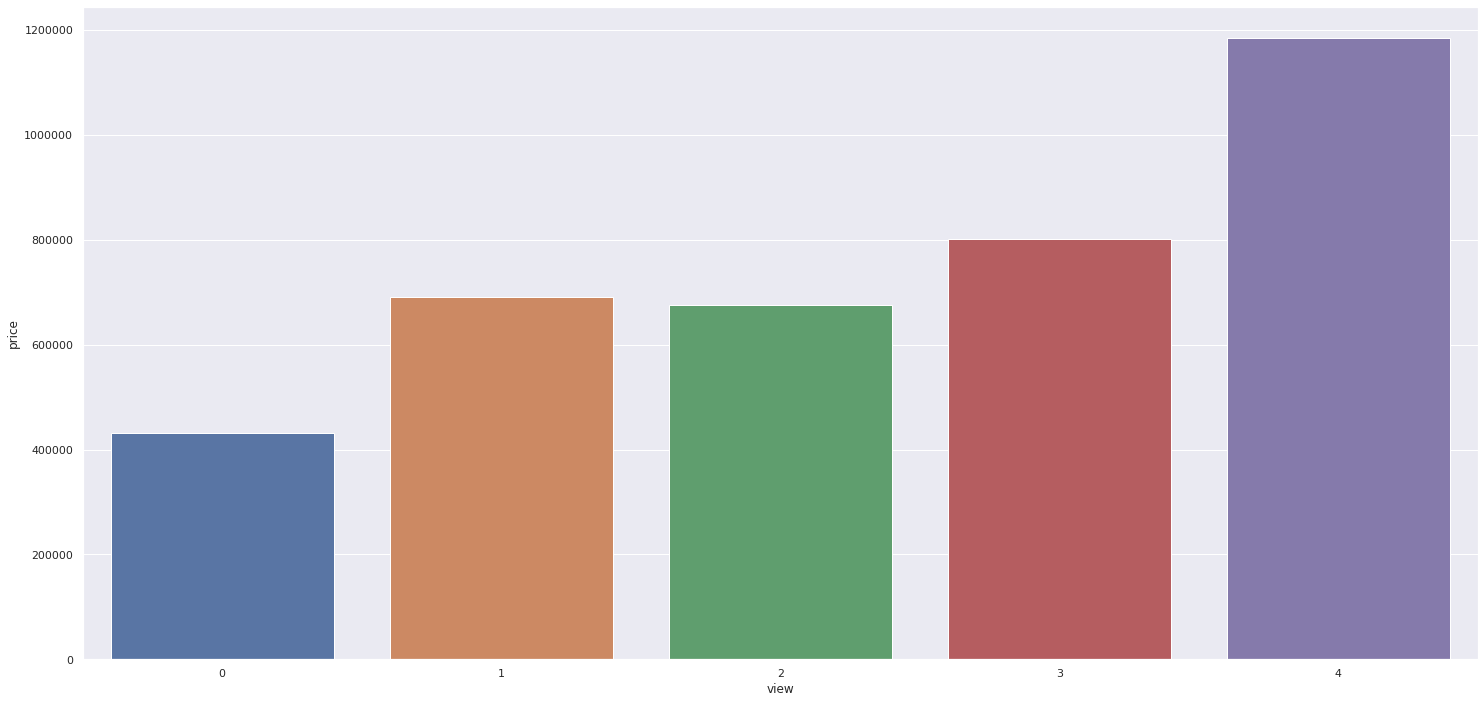

In [263]:
aux1 = df3[['price', 'view']].groupby( 'view' ).median().reset_index()
sns.barplot( x='view', y='price', data=aux1);
plt.ticklabel_format(style='plain', axis='y')

### H5. Casas  em melhores condiçoes são em média 50% mais caras.

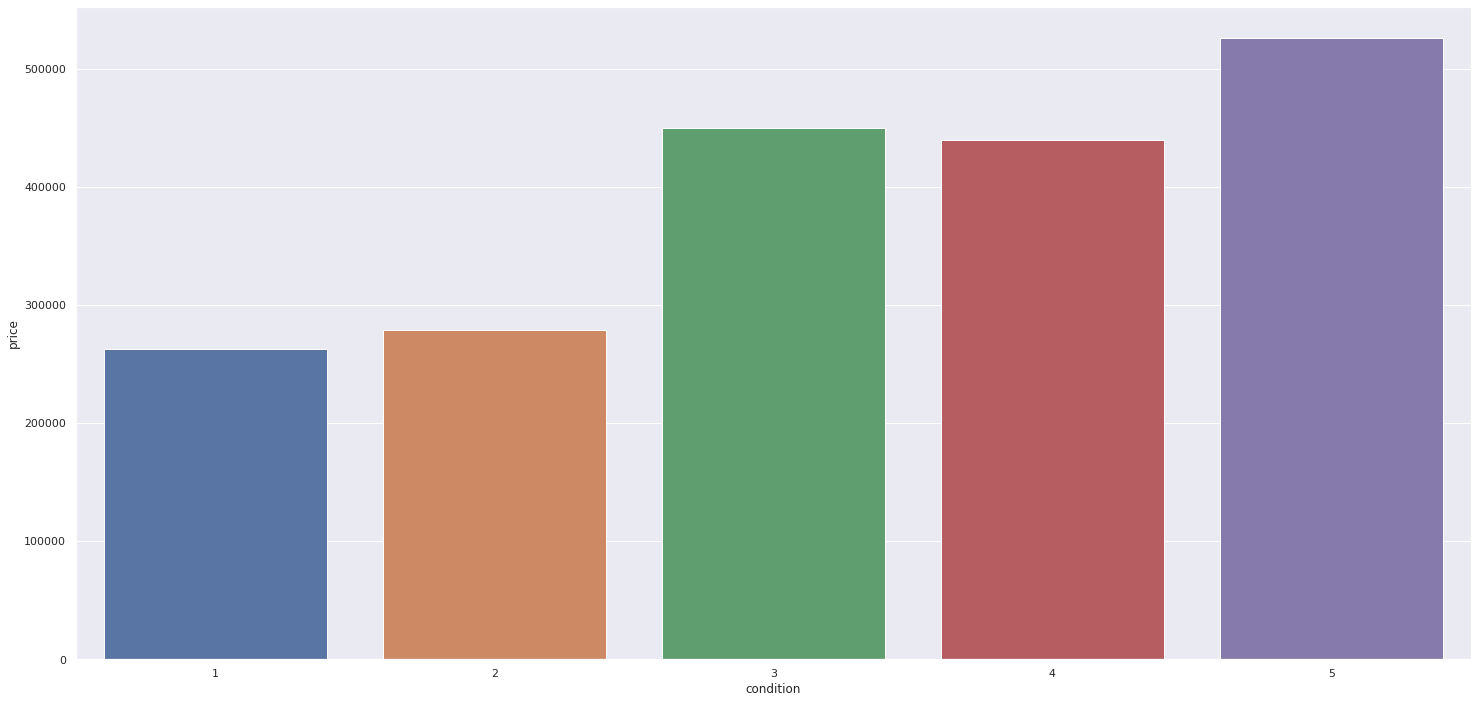

In [264]:
aux1 = df3[['price', 'condition']].groupby( 'condition' ).median().reset_index()
sns.barplot( x='condition', y='price', data=aux1);
plt.ticklabel_format( style='plain', axis='y')

### H6. Casas mais recentes aproveitam mais o espaço vertical.

### H7. Casas que possuem porão são em média 20% mais caras. 

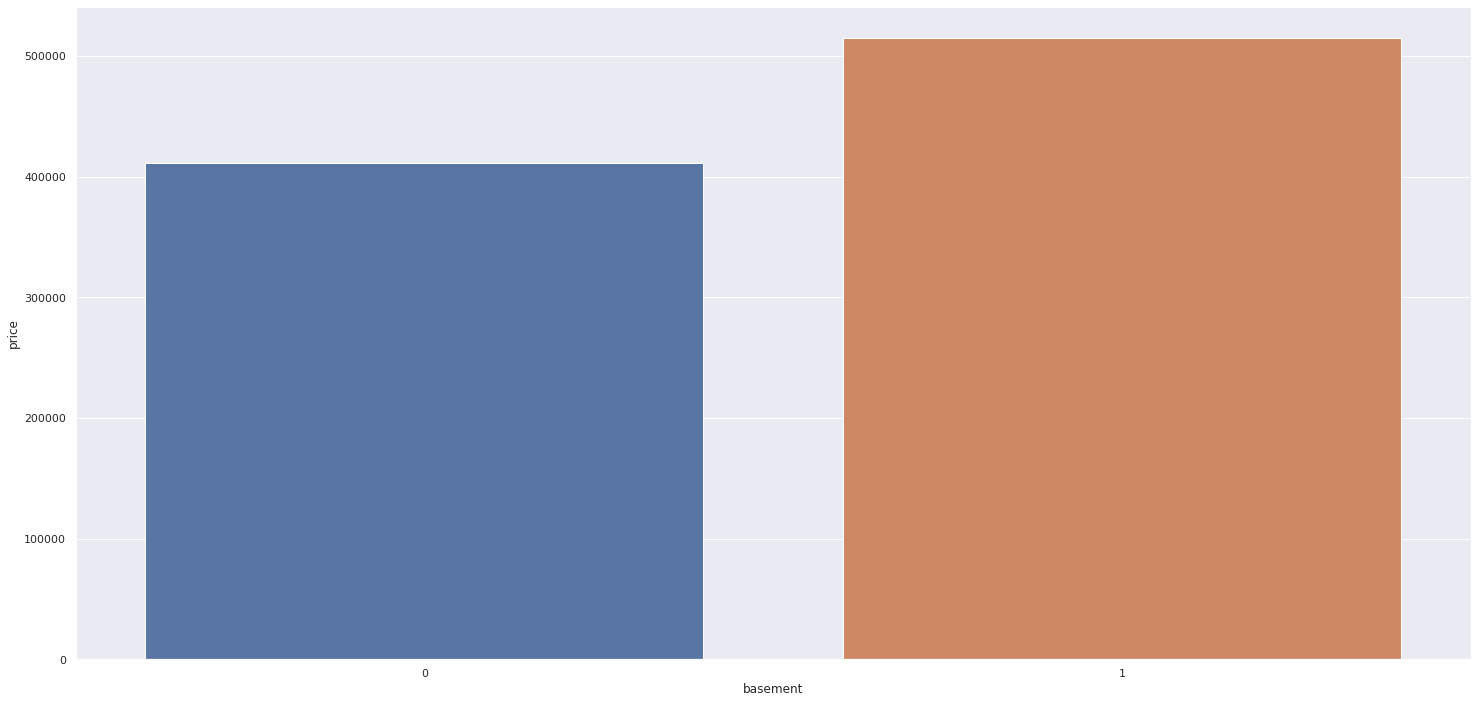

In [265]:
aux1 = df3[['price','basement']].groupby( 'basement' ).median().reset_index()
sns.barplot( x='basement', y='price', data=aux1 );


### H8. Casas contruidas antes de 1970 deveriam ser mais baratas.

### H9. Casas reformadas nos ultimos 5 anos deveriam 30% mais caras.

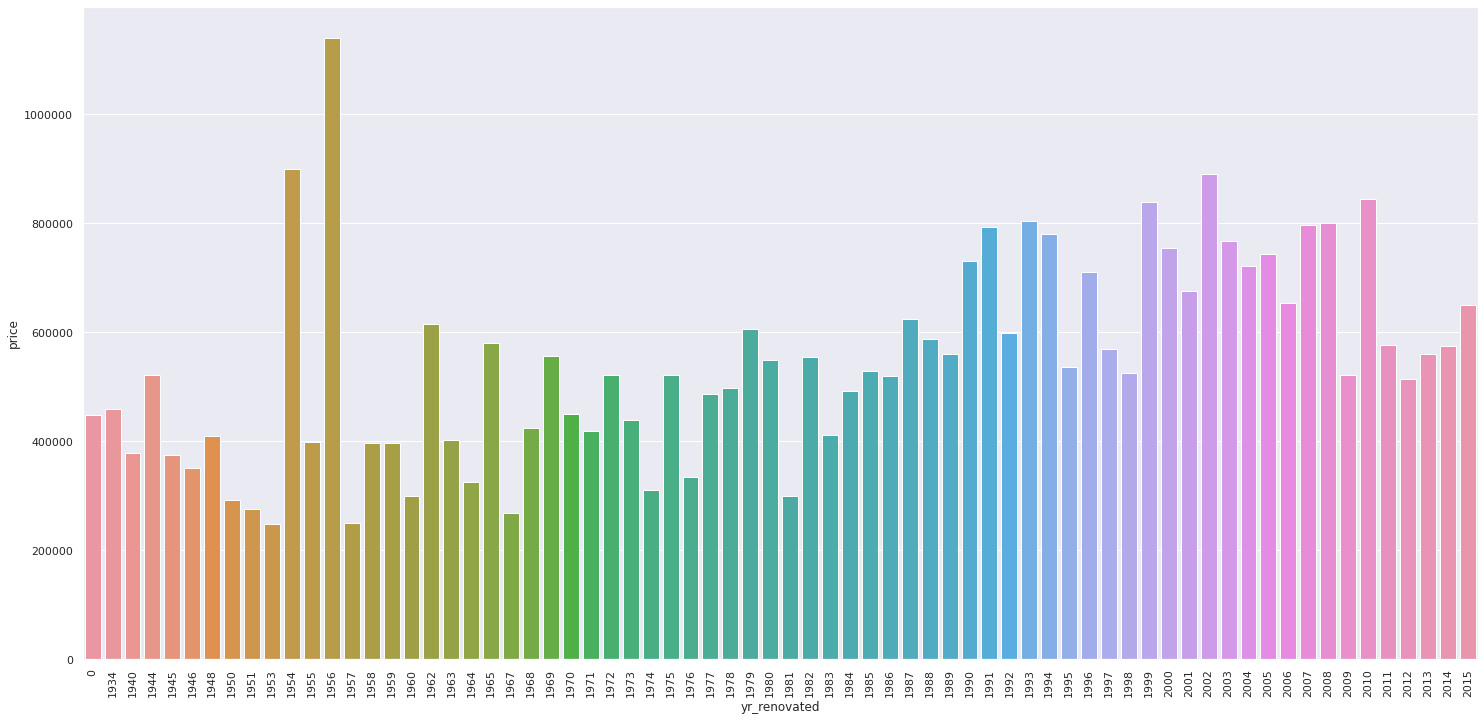

In [291]:
aux1 = df3[['price', 'yr_renovated']].groupby( 'yr_renovated' ).median().reset_index()

sns.barplot( x='yr_renovated', y='price', data=aux1);
plt.xticks( rotation=90 );
plt.ticklabel_format( style='plain', axis='y' )

### H10. Casas que possuem vizinhos com grandes áreas deveriam ter área maior.

### H11. Casas Contruidas nos ultimos 20 anos tem qualidade superior.

### H12. Deveriam ser vendidas mais casas em estações de clima quente.

### H13. Deveriam ser vendidas mais casas na segunda metade do mês.

## 3.2. Analise Multivariada

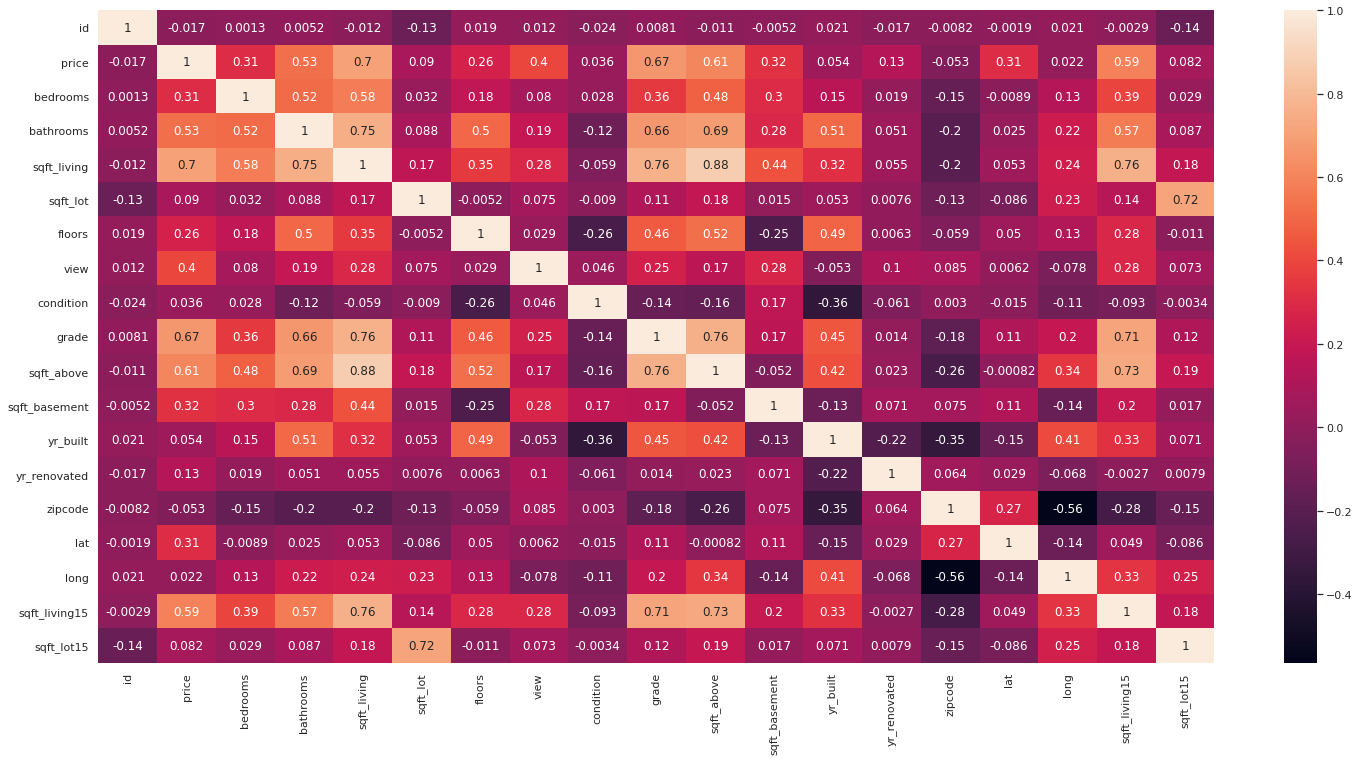

In [266]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True);

In [267]:
price_season = df3[['price', 'season']].groupby('season').median().reset_index()
price_season

,season,price
0,autumn,443000
1,spring,465000
2,summer,455000
3,winter,430000


In [268]:
quant_season = df3[['id', 'season']].groupby('season').count().reset_index()
quant_season

,season,id
0,autumn,5063
1,spring,6520
2,summer,6331
3,winter,3699


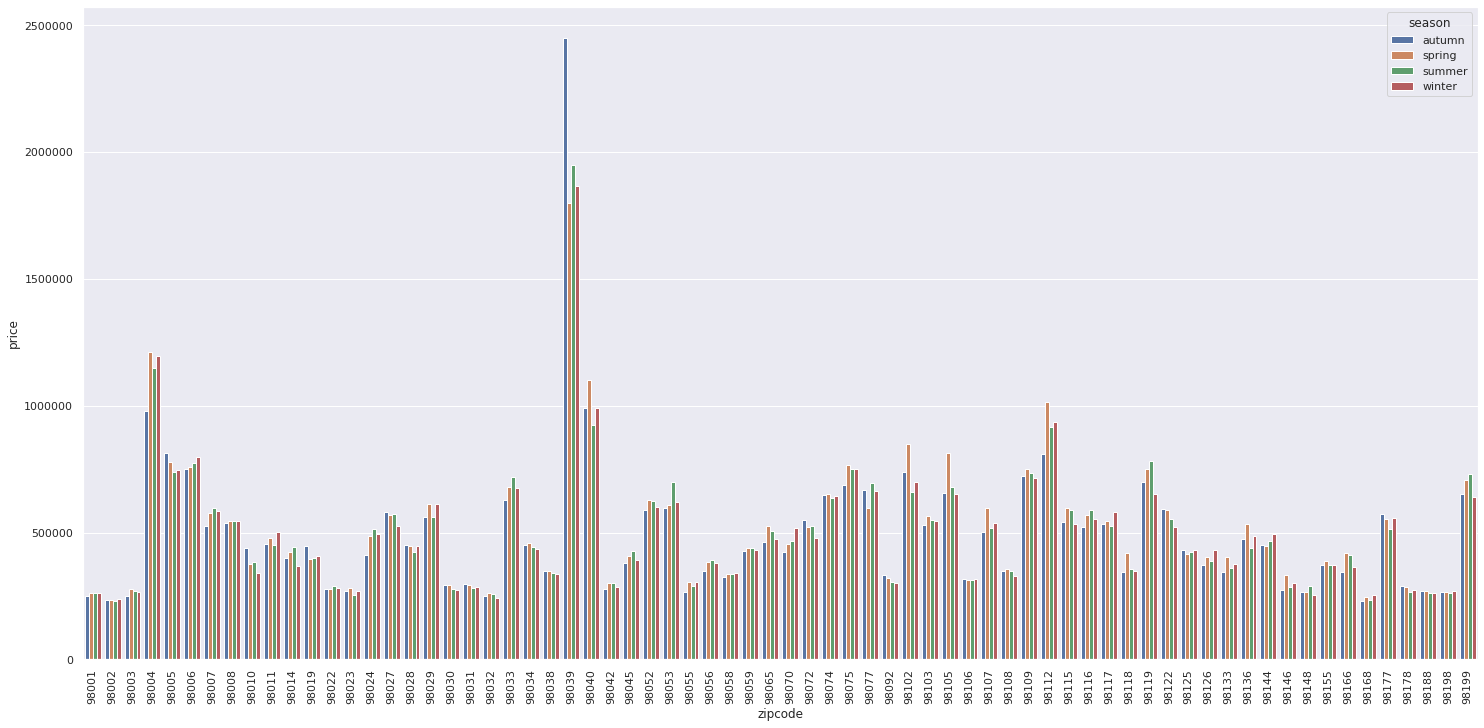

In [269]:
by_zip_season = df3[['price','zipcode', 'season']].groupby( ['zipcode', 'season'] ).median().reset_index()
sns.barplot( x='zipcode', y='price', hue='season', data=by_zip_season );
plt.xticks( rotation=90);
plt.ticklabel_format(style='plain', axis='y');

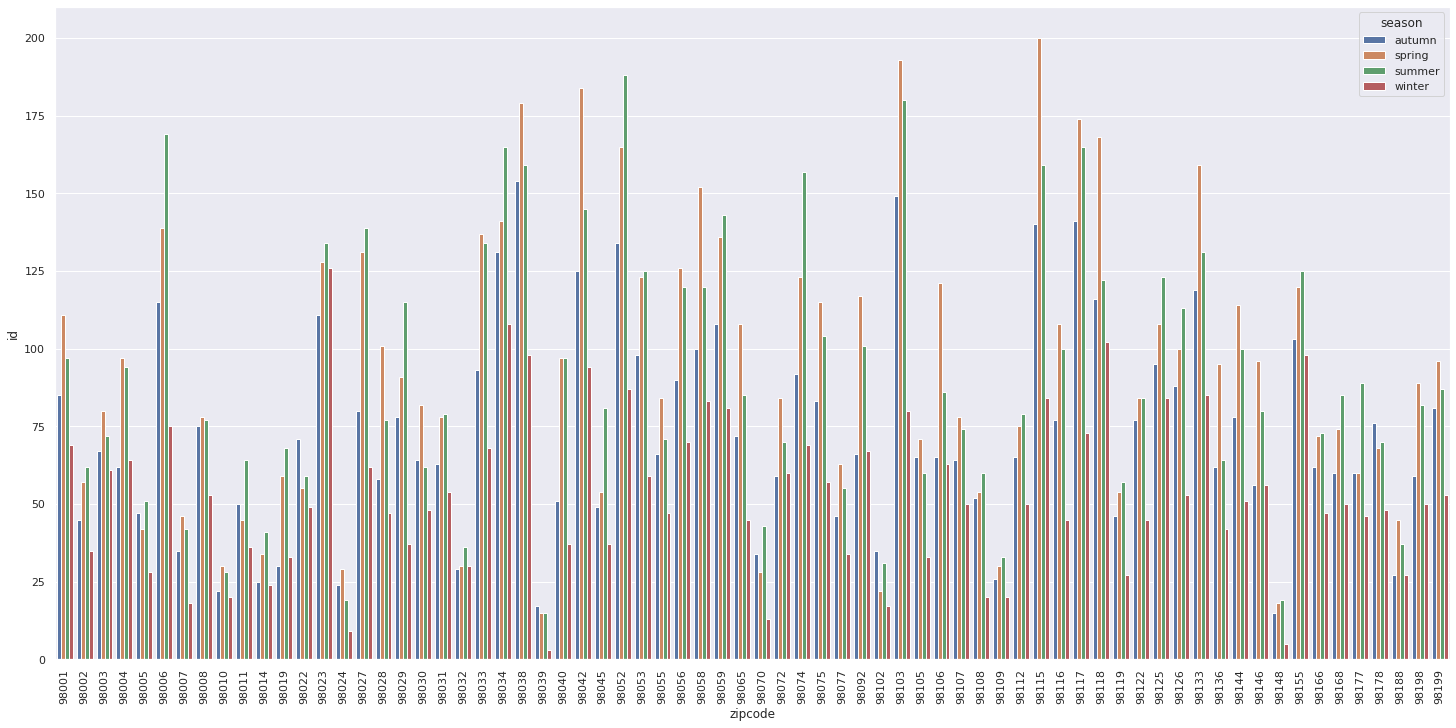

In [270]:
by_zip_season = df3[['id','zipcode', 'season']].groupby( ['zipcode', 'season'] ).count().reset_index()
sns.barplot( x='zipcode', y='id', hue='season', data=by_zip_season );
plt.xticks( rotation=90);

In [271]:
price_zip = df3[['price', 'zipcode']].groupby('zipcode').median().reset_index()
price_zip.head()

,zipcode,price
0,98001,260000.00
1,98002,235000.00
2,98003,267475.00
3,98004,1150000.00
4,98005,765475.00


In [272]:
relatorio = df3[['id', 'zipcode', 'season', 'condition', 'price']]

In [273]:
#relatorio.columns = ['Id Imovel', 'zipcode', 'season', 'condition', 'price']

In [274]:
price_zip.head()

,zipcode,price
0,98001,260000.00
1,98002,235000.00
2,98003,267475.00
3,98004,1150000.00
4,98005,765475.00


In [275]:
relatorio = pd.merge( relatorio, price_zip, how='inner', on='zipcode' ).sort_values(by='zipcode')

In [276]:
relatorio.columns = ['id', 'zipcode', 'season', 'condition', 'price', 'median']

In [277]:
relatorio['profit'] =  relatorio['median'] - relatorio['price'] 

In [278]:
relatorio['compra'] = relatorio.apply(lambda x: 'sim' if ( ( x['profit'] > 0 ) & ( x['condition'] >= 3 ) ) else 'Nao', axis=1)

In [279]:
relatorio.head()

,id,zipcode,season,condition,price,median,profit,compra
9946,2817850290,98001,winter,3,258000,260000.00,2000.00,sim
9723,3521049048,98001,summer,3,515000,260000.00,-255000.00,Nao
9724,3356407665,98001,autumn,3,180000,260000.00,80000.00,sim
9725,2721049059,98001,spring,4,225000,260000.00,35000.00,sim
9726,3356403820,98001,winter,3,115000,260000.00,145000.00,sim


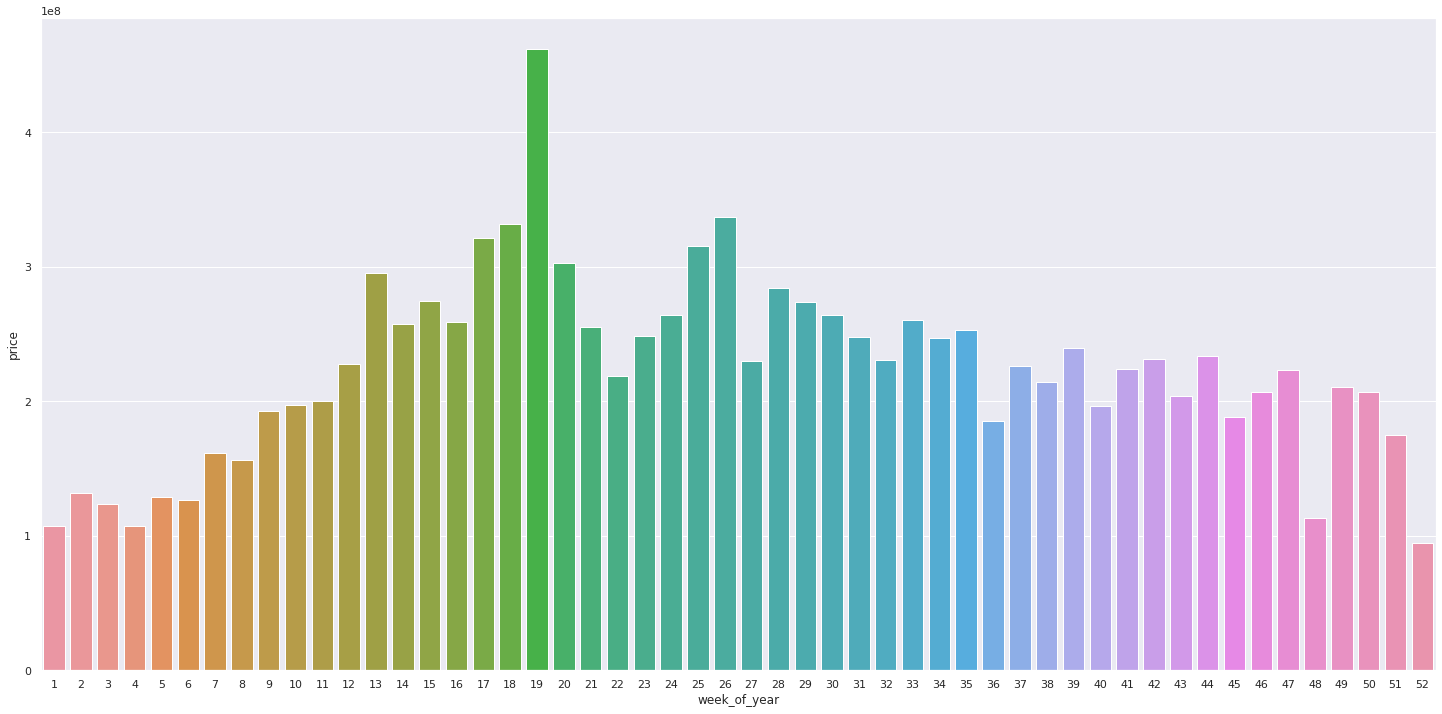

In [280]:
aux2 = df3[['price', 'week_of_year']].groupby('week_of_year').sum().reset_index()
sns.barplot(x='week_of_year', y='price', data=aux2);

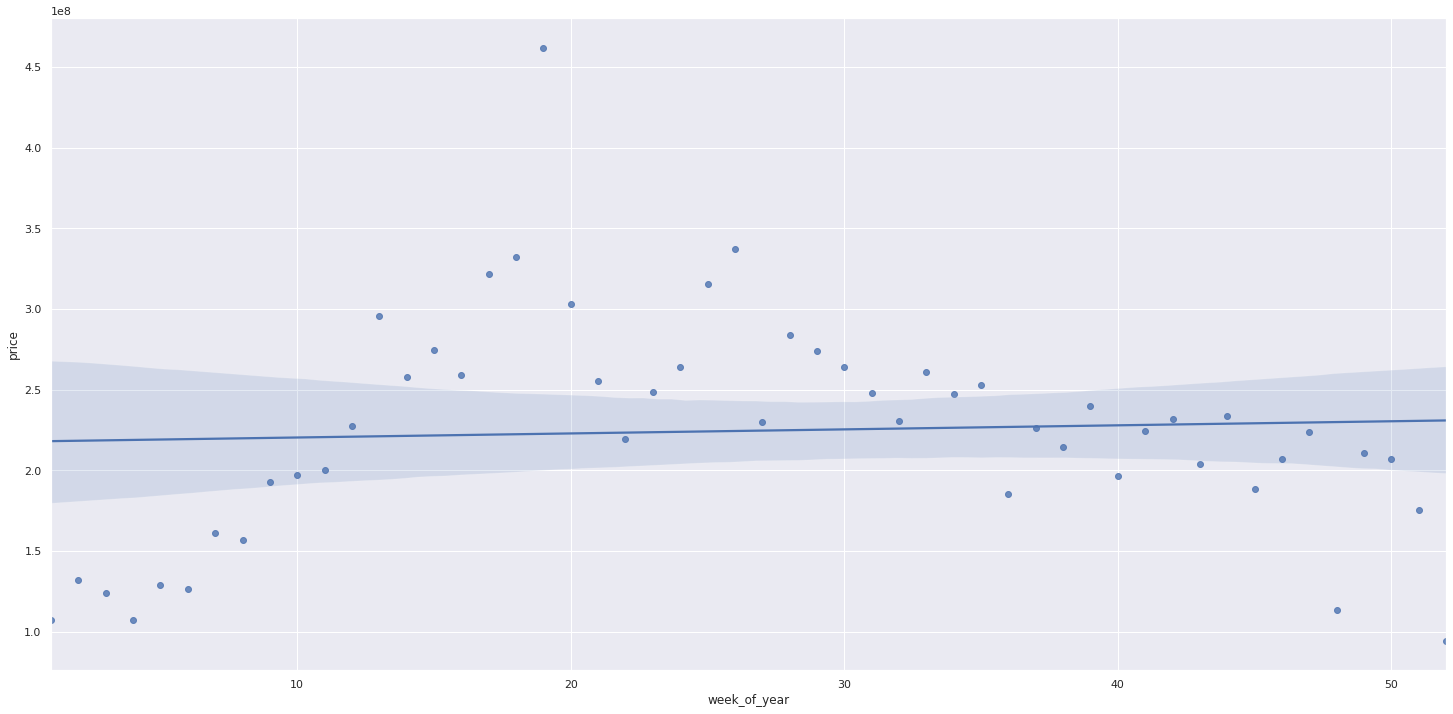

In [281]:
sns.regplot( x='week_of_year', y='price', data=aux2);

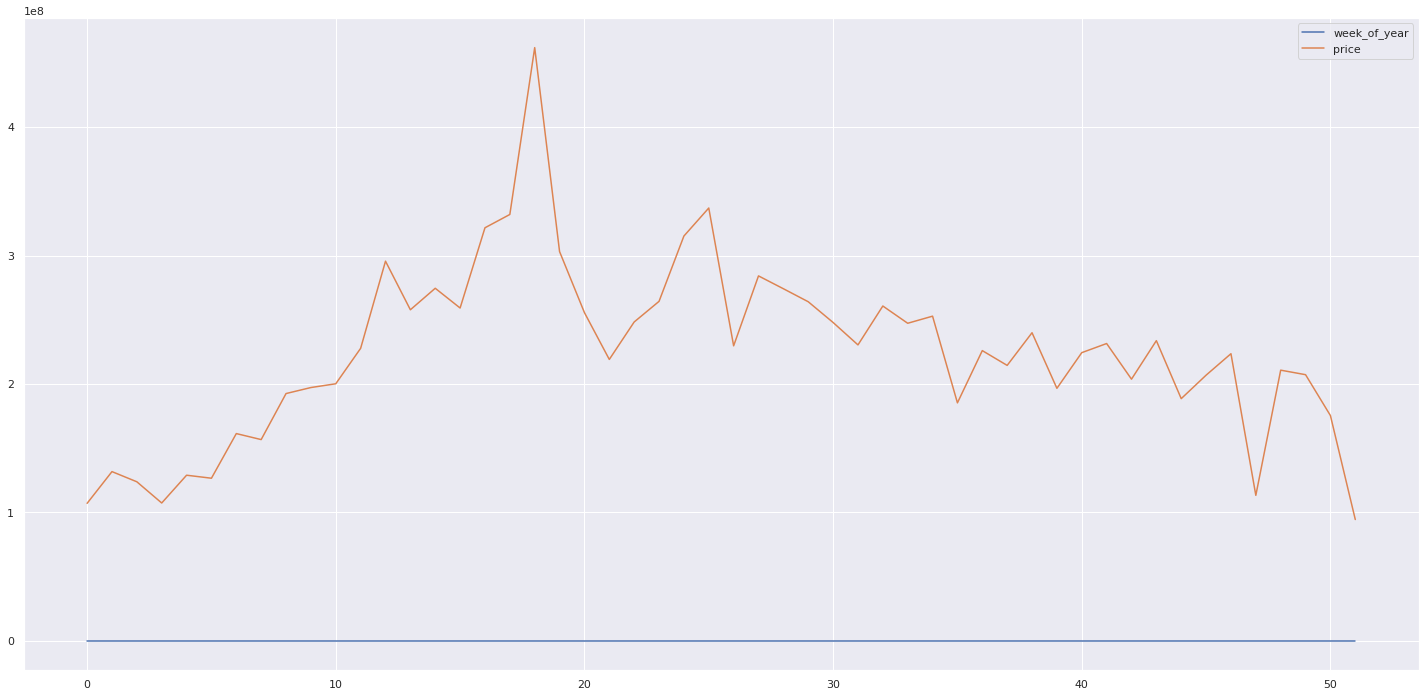

In [282]:
aux2.plot();

<AxesSubplot:xlabel='week_of_year'>

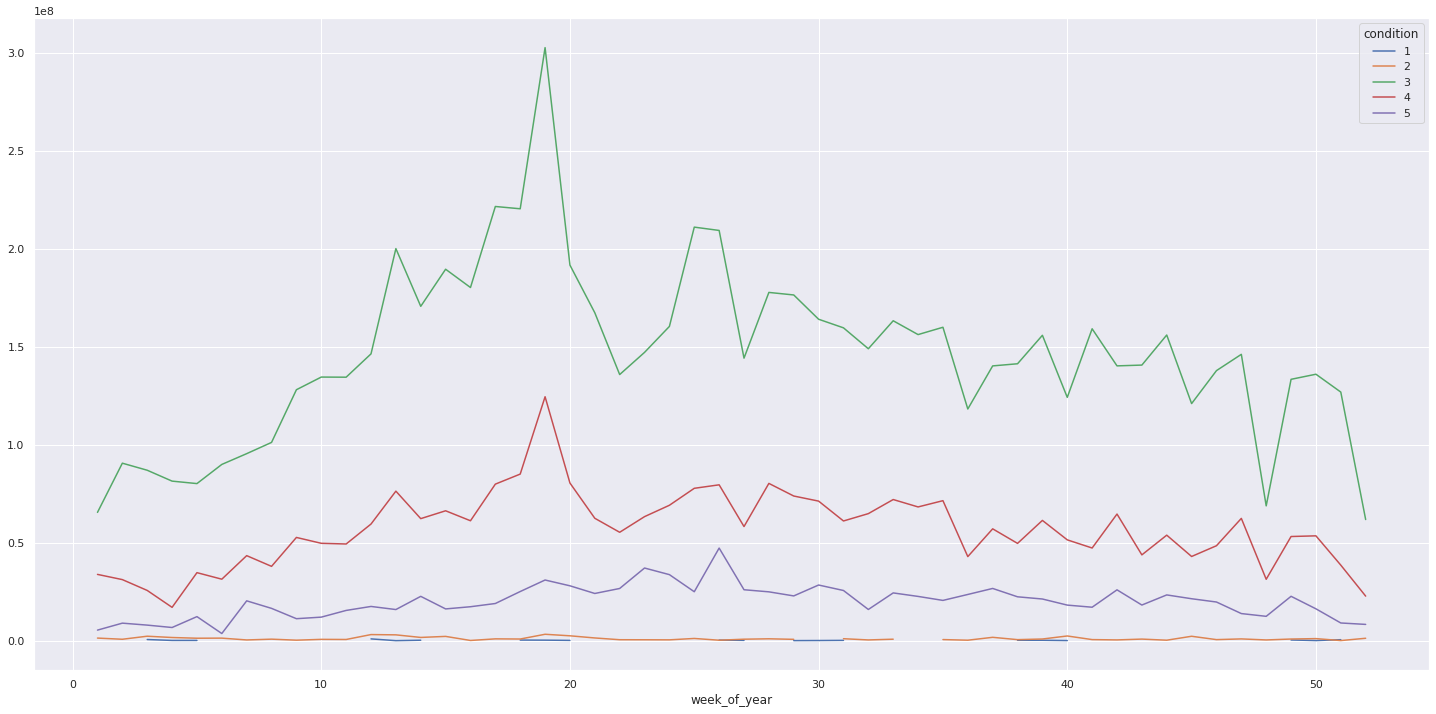

In [283]:
aux3 = df3[['week_of_year','condition','price']].groupby( ['week_of_year','condition']).sum().reset_index()
aux3.pivot( index='week_of_year', columns='condition', values='price' ).plot()

In [284]:
aux1 = df3[['id', 'condition']].groupby('condition').count().reset_index()
aux1

,condition,id
0,1,30
1,2,172
2,3,14031
3,4,5679
4,5,1701
